# Exercise 3. 
In the following section, we will compute the covariance matrix of the 30 top-performing ETFs within the energy sector, using one year of historical data. Subsequently, Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) will be applied to the covariance matrix to explore its underlying structure and dominant sources of variation.

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

In [2]:
# --- 1. Define tickers ---
etf_tickers = [
    "URA", "NLR", "URNJ", "PBW", "URNM", "CNRG", "ICLN", "TAN", "PBD", "SMOG",
    "GRID", "QCLN", "CRAK", "ACES", "AMNA", "AMND", "TPYP", "ENFR", "EMLP",
    "MLPX", "RSPG", "MLPA", "USAI", "XLE", "VDE", "IYE", "FENY", "IXC", "XOP", "OIH"
]


In [3]:
# --- 2. Define period (1 year) ---
end_date = datetime.today()
start_date = end_date - timedelta(days=365)


In [4]:
# --- 3. Download data ---
all_data = []
for ticker in etf_tickers:
    print(f"Downloading {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)
    if not data.empty:
        data["Ticker"] = ticker
        # Calculate daily log returns
        data["Log_Return"] = np.log(data["Close"] / data["Close"].shift(1))
        data.to_csv(f"{ticker}_1y.csv")
        all_data.append(data)
    else:
        print(f"⚠️ No data for {ticker}")


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


/var/folders/zk/wtcj96q51bq1zr_cdt22bjc40000gn/T/ipykernel_9810/287763063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


## PCA

We will now perform PCA on the correlation matrix. As a preliminary step, the correlation matrix must be standardized to ensure proper scaling and comparability among its components.

✅ Saved combined data to 'energy_etfs_1y.csv'

📊 Covariance Matrix of Log Returns:
Ticker                                                                   \
Ticker             ACES          AMNA      AMND          CNRG      CRAK   
Ticker Ticker                                                             
       ACES    0.000360  1.546087e-05  0.000033  3.127171e-04  0.000074   
       AMNA    0.000015  9.779780e-05  0.000017  6.180335e-06  0.000025   
       AMND    0.000033  1.691144e-05  0.000175  1.797075e-05  0.000013   
       CNRG    0.000313  6.180335e-06  0.000018  3.360603e-04  0.000076   
       CRAK    0.000074  2.511907e-05  0.000013  7.588403e-05  0.000077   
       EMLP    0.000001  3.924876e-05  0.000022  1.247313e-05  0.000030   
       ENFR   -0.000017  4.915172e-05  0.000036  4.830233e-07  0.000033   
       FENY   -0.000004  5.588672e-05  0.000033  3.917319e-06  0.000062   
       GRID    0.000051  2.299514e-05  0.000038  5.184745e-05  0.000032   
       ICLN    0.

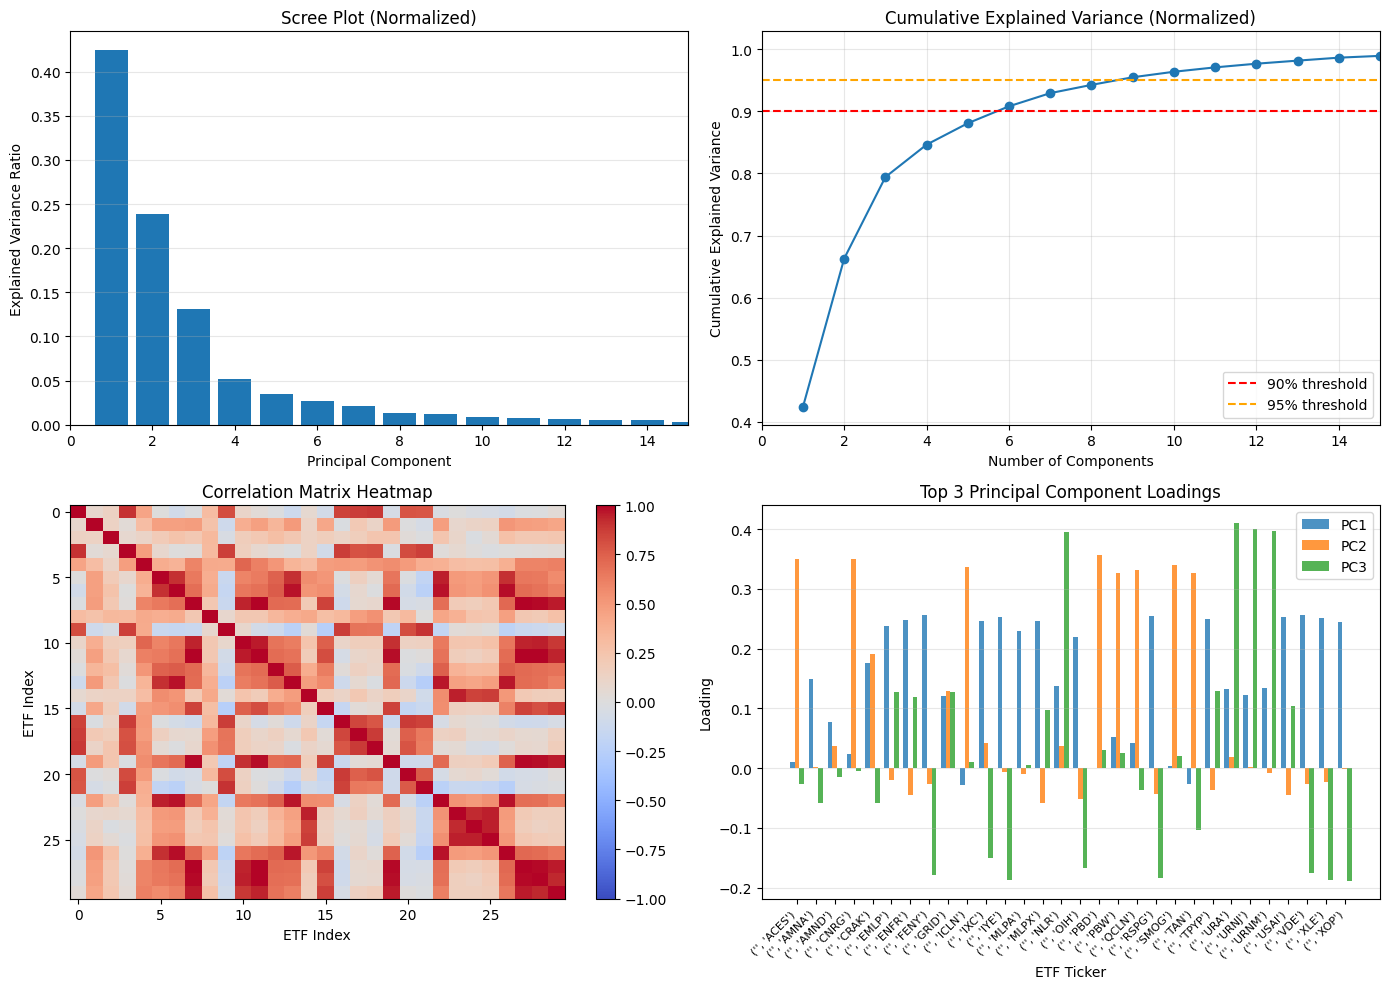

✅ Saved PCA-transformed returns to 'pca_transformed_returns_normalized.csv'

📊 Verification - sklearn vs manual projection:
Max difference: 6.0652691171


In [8]:

# --- 4. Combine all ETFs ---
if all_data:
    combined_df = pd.concat(all_data)
    combined_df.to_csv("energy_etfs_1y.csv")
    print("✅ Saved combined data to 'energy_etfs_1y.csv'")
    
    # --- 5. Compute covariance matrix of log returns ---
    returns_pivot = combined_df.pivot_table(
        index=combined_df.index, 
        columns='Ticker', 
        values='Log_Return'
    )
    
    # Remove NaN values
    returns_pivot = returns_pivot.dropna()
    
    # Calculate covariance matrix of log returns
    cov_matrix = returns_pivot.cov()
    
    print("\n📊 Covariance Matrix of Log Returns:")
    print(cov_matrix)
    
    # Save to CSV
    cov_matrix.to_csv("log_returns_covariance_matrix.csv")
    print("✅ Saved covariance matrix to 'log_returns_covariance_matrix.csv'")
    
    # --- 6. Manual standardization: subtract mean and divide by std ---
    # Calculate mean and std for each ticker
    means = returns_pivot.mean()
    stds = returns_pivot.std()
    
    print("\n📊 Before Standardization:")
    print(f"Sample means: {means.values[:5]}")
    print(f"Sample stds: {stds.values[:5]}")
    
    # Manual standardization: (X - μ) / σ
    returns_standardized = (returns_pivot - means) / stds
    
    # Verify standardization
    print("\n📊 After Manual Standardization:")
    print(f"Sample means: {returns_standardized.mean().values[:5]} (should be ~0)")
    print(f"Sample stds: {returns_standardized.std().values[:5]} (should be ~1)")
    
    # Save standardized returns
    returns_standardized.to_csv("standardized_log_returns.csv")
    print("✅ Saved standardized returns to 'standardized_log_returns.csv'")
    
    # --- 7. Compute correlation matrix (normalized covariance matrix) ---
    # Method 1: From standardized data
    correlation_matrix = returns_standardized.cov()
    
    # Method 2: Direct calculation from original data (for verification)
    correlation_matrix_direct = returns_pivot.corr()
    
    print("\n📊 Correlation Matrix (Normalized Covariance):")
    print(correlation_matrix)
    
    print("\n📊 Verification - difference between methods:")
    print(f"Max difference: {np.abs(correlation_matrix - correlation_matrix_direct).max().max():.10f}")
    
    correlation_matrix.to_csv("correlation_matrix.csv")
    print("✅ Saved correlation matrix to 'correlation_matrix.csv'")
    
    # --- 8. Perform PCA on manually standardized data ---
    # Convert to numpy array for PCA
    returns_std_array = returns_standardized.values
    
    # Method 1: Using sklearn PCA
    pca = PCA()
    pca.fit(returns_std_array)
    
    # Get eigenvalues (explained variance)
    eigenvalues = pca.explained_variance_
    
    # Get eigenvectors (principal components)
    eigenvectors = pca.components_
    
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    # Cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    print("\n📊 PCA Results (from manually standardized data):")
    print(f"Number of components: {len(eigenvalues)}")
    print(f"\nTop 5 Eigenvalues:\n{eigenvalues[:5]}")
    print(f"\nTop 5 Explained Variance Ratios:\n{explained_variance_ratio[:5]}")
    print(f"\nCumulative variance explained by top 5 components: {cumulative_variance[4]:.2%}")
    
    # --- 9. Alternative: Manual eigendecomposition of correlation matrix ---
    eigenvalues_manual, eigenvectors_manual = np.linalg.eig(correlation_matrix)
    
    # Sort by eigenvalues (descending)
    idx = eigenvalues_manual.argsort()[::-1]
    eigenvalues_manual = eigenvalues_manual[idx]
    eigenvectors_manual = eigenvectors_manual[:, idx]
    
    print("\n📊 Manual Eigendecomposition of Correlation Matrix:")
    print(f"Top 5 Eigenvalues: {eigenvalues_manual.real[:5]}")
    print(f"Sum of eigenvalues: {eigenvalues_manual.real.sum():.2f} (should equal {len(etf_tickers)})")
    
    # Verify both methods give same results
    print("\n📊 Verification - PCA vs Manual Eigendecomposition:")
    print(f"Eigenvalue difference: {np.abs(eigenvalues[:5] - eigenvalues_manual.real[:5]).max():.10f}")
    
    # Create DataFrame for principal components
    pc_df = pd.DataFrame(
        eigenvectors.T,
        columns=[f'PC{i+1}' for i in range(len(eigenvalues))],
        index=returns_pivot.columns
    )
    
    print("\n📊 First 3 Principal Components (loadings):")
    print(pc_df.iloc[:, :3])
    
    # Save PCA results
    pc_df.to_csv("pca_components_normalized.csv")
    
    # Save explained variance
    variance_df = pd.DataFrame({
        'Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
        'Eigenvalue': eigenvalues,
        'Explained_Variance_Ratio': explained_variance_ratio,
        'Cumulative_Variance': cumulative_variance
    })
    variance_df.to_csv("pca_explained_variance_normalized.csv", index=False)
    
    # --- 10. Visualize PCA results ---
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Scree plot
    axes[0, 0].bar(range(1, len(eigenvalues) + 1), explained_variance_ratio)
    axes[0, 0].set_xlabel('Principal Component')
    axes[0, 0].set_ylabel('Explained Variance Ratio')
    axes[0, 0].set_title('Scree Plot (Normalized)')
    axes[0, 0].set_xlim(0, min(15, len(eigenvalues) + 1))
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Cumulative variance plot
    axes[0, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    axes[0, 1].axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
    axes[0, 1].axhline(y=0.95, color='orange', linestyle='--', label='95% threshold')
    axes[0, 1].set_xlabel('Number of Components')
    axes[0, 1].set_ylabel('Cumulative Explained Variance')
    axes[0, 1].set_title('Cumulative Explained Variance (Normalized)')
    axes[0, 1].legend()
    axes[0, 1].set_xlim(0, min(15, len(cumulative_variance) + 1))
    axes[0, 1].grid(True, alpha=0.3)
    
    # Heatmap of correlation matrix
    im = axes[1, 0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1, 0].set_title('Correlation Matrix Heatmap')
    axes[1, 0].set_xlabel('ETF Index')
    axes[1, 0].set_ylabel('ETF Index')
    plt.colorbar(im, ax=axes[1, 0])
    
    # Top 3 PC loadings
    pc_loadings = pc_df.iloc[:, :3]
    x = np.arange(len(pc_loadings))
    width = 0.25
    axes[1, 1].bar(x - width, pc_loadings['PC1'], width, label='PC1', alpha=0.8)
    axes[1, 1].bar(x, pc_loadings['PC2'], width, label='PC2', alpha=0.8)
    axes[1, 1].bar(x + width, pc_loadings['PC3'], width, label='PC3', alpha=0.8)
    axes[1, 1].set_xlabel('ETF Ticker')
    axes[1, 1].set_ylabel('Loading')
    axes[1, 1].set_title('Top 3 Principal Component Loadings')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(pc_loadings.index, rotation=45, ha='right', fontsize=8)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('pca_analysis_normalized.png', dpi=300, bbox_inches='tight')
    print("✅ Saved PCA visualization to 'pca_analysis_normalized.png'")
    plt.show()
    
    # --- 11. Project data onto principal components ---
    pca_transformed = pca.transform(returns_std_array)
    pca_transformed_df = pd.DataFrame(
        pca_transformed,
        columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])],
        index=returns_pivot.index
    )
    pca_transformed_df.to_csv("pca_transformed_returns_normalized.csv")
    print("✅ Saved PCA-transformed returns to 'pca_transformed_returns_normalized.csv'")
    
    # --- 12. Manual projection (for verification) ---
    # Project: Z = X_standardized @ eigenvectors.T
    manual_projection = returns_std_array @ eigenvectors_manual
    
    print("\n📊 Verification - sklearn vs manual projection:")
    print(f"Max difference: {np.abs(pca_transformed[:, :5] - manual_projection[:, :5]).max():.10f}")
    
else:
    print("❌ No data downloaded. Check tickers or internet connection.")
    

## SVD
The following analysis applies Singular Value Decomposition (SVD) to the correlation matrix, enabling a deeper examination of its eigenstructure and the principal modes of variation that drive interdependencies among the variables.



📊 SVD Shapes:
U shape (left singular vectors): (30, 30)
Singular values shape: (30,)
V^T shape (right singular vectors transposed): (30, 30)
V shape (right singular vectors): (30, 30)

📊 All Singular Values:
[1.27341766e+01 7.15856782e+00 3.93516101e+00 1.56490916e+00
 1.03329000e+00 8.17785729e-01 6.35377687e-01 3.98118327e-01
 3.68041460e-01 2.66102348e-01 2.11374580e-01 1.77420306e-01
 1.48054487e-01 1.43449173e-01 8.68245348e-02 6.79312495e-02
 5.60175263e-02 4.56855298e-02 3.73035279e-02 2.96574882e-02
 2.10603201e-02 1.86855136e-02 1.28643484e-02 1.06193159e-02
 8.94576138e-03 6.17197859e-03 3.37328990e-03 1.84693068e-03
 6.87522054e-04 4.96502388e-04]

📊 Top 10 Singular Values:
[12.73417657  7.15856782  3.93516101  1.56490916  1.03329     0.81778573
  0.63537769  0.39811833  0.36804146  0.26610235]

📊 Sum of singular values: 30.0000
Number of ETFs: 30

📊 SVD Verification:
Max reconstruction error: 4.0523140399e-15 (should be ~0)
Correlation matrix is symmetric: True
U equals V 

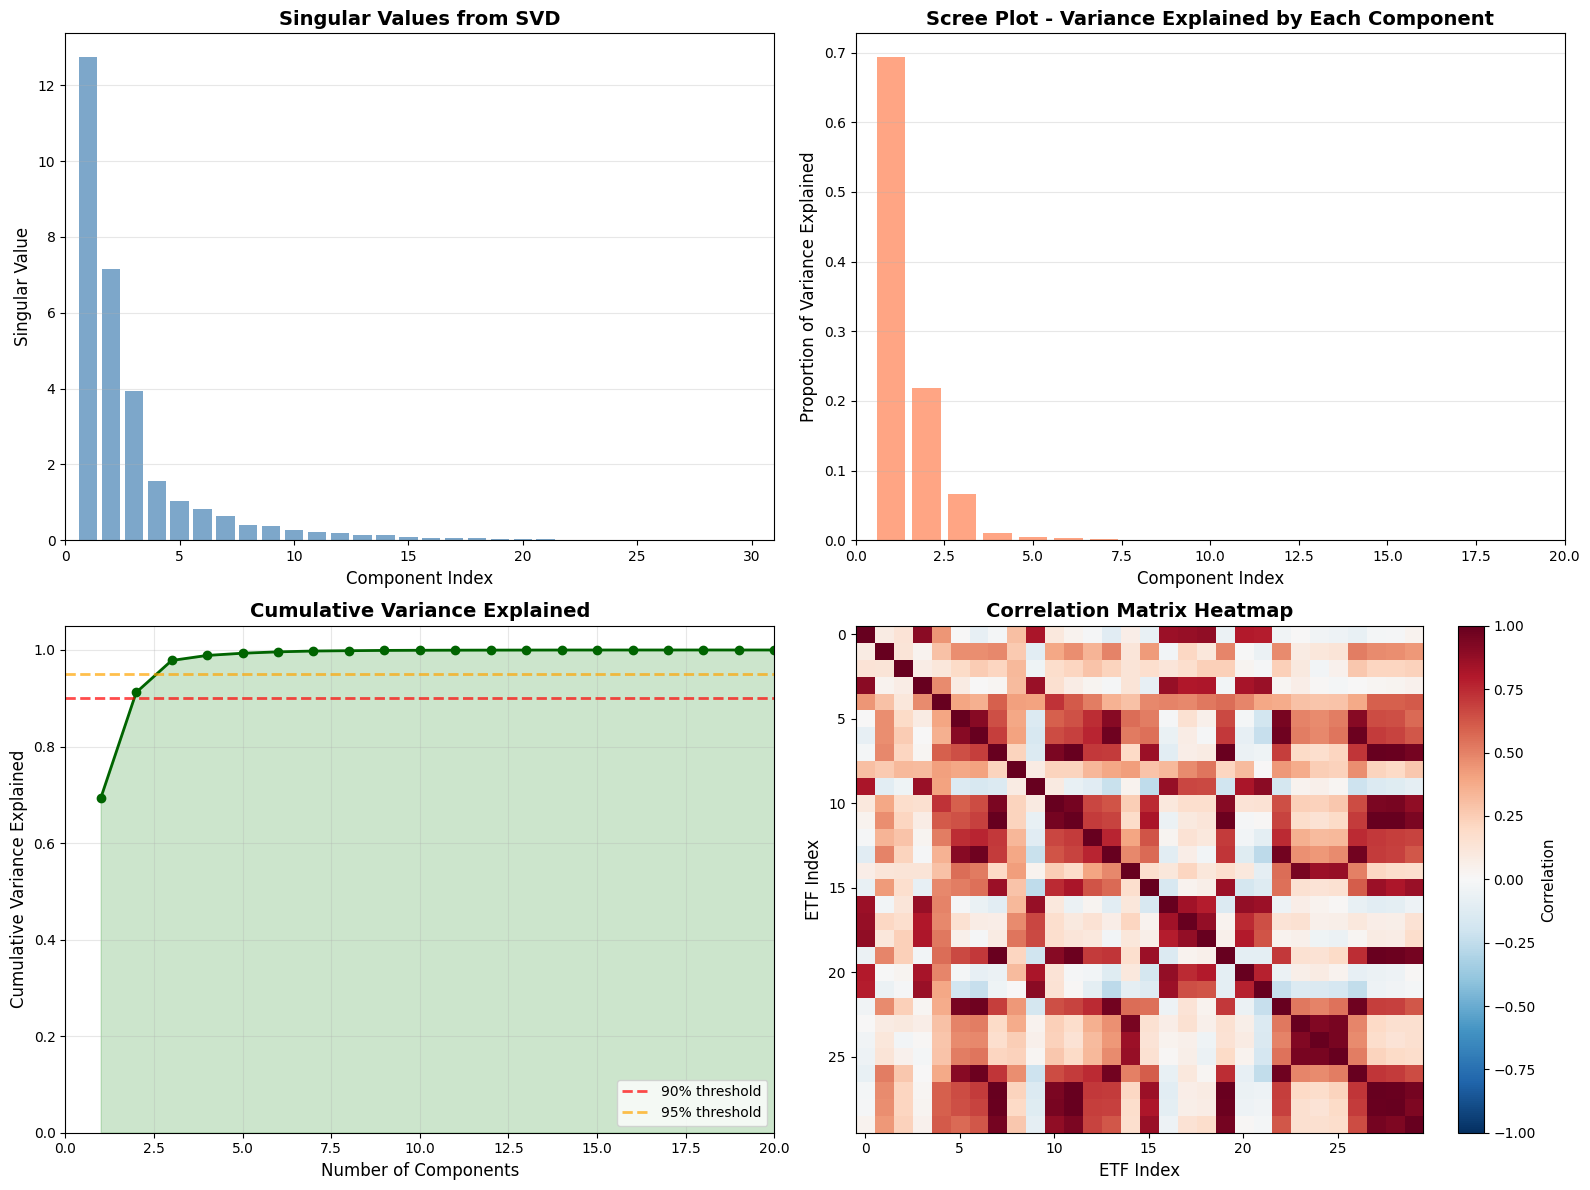

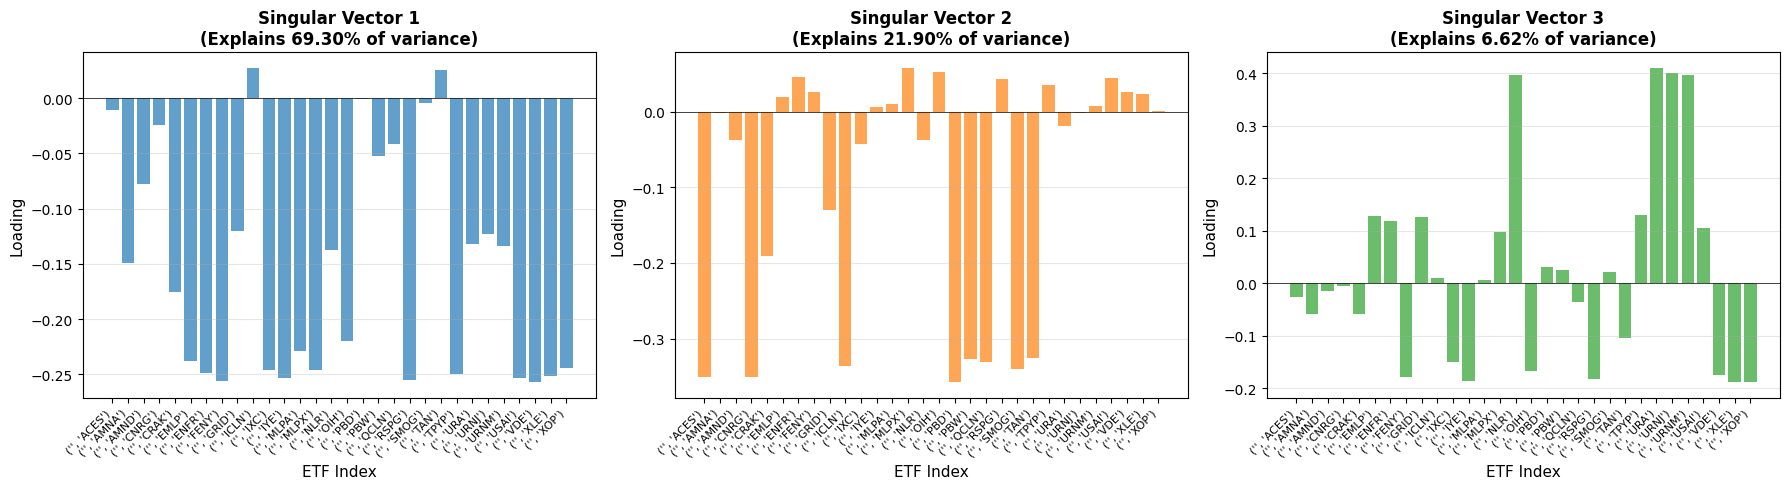

✅ Saved SVD-projected returns to 'svd_projected_returns.csv'

📊 Projected Data Statistics (first 5 components):
  Component 1: mean=0.000000, std=3.530331, min=-11.3775, max=7.6696
  Component 2: mean=-0.000000, std=2.646934, min=-5.0099, max=9.5633
  Component 3: mean=0.000000, std=1.962507, min=-4.7728, max=4.4494
  Component 4: mean=-0.000000, std=1.237584, min=-3.0326, max=2.3703
  Component 5: mean=-0.000000, std=1.005637, min=-2.4307, max=1.5227

📊 SVD INTERPRETATION SUMMARY

Total number of ETFs analyzed: 30
Total number of singular values/components: 30

Dominant component (SV1) explains: 69.30% of variance
Top 3 components explain: 97.82% of variance
Top 5 components explain: 99.33% of variance

Effective dimensionality (components for 90% variance): 2
Effective dimensionality (components for 95% variance): 3

Top 5 ETFs contributing to first singular vector:
  ('', 'VDE'): -0.2569
  ('', 'FENY'): -0.2563
  ('', 'RSPG'): -0.2548
  ('', 'IYE'): -0.2537
  ('', 'USAI'): -0.2530


In [6]:


# --- 5. Computing SVD ---
if all_data:
    
    # Perform SVD: Correlation = U @ S @ V^T
    U, singular_values, Vt = np.linalg.svd(correlation_matrix.values)
    
    # V is the transpose of Vt
    V = Vt.T
    
    print(f"\n📊 SVD Shapes:")
    print(f"U shape (left singular vectors): {U.shape}")
    print(f"Singular values shape: {singular_values.shape}")
    print(f"V^T shape (right singular vectors transposed): {Vt.shape}")
    print(f"V shape (right singular vectors): {V.shape}")
    
    print(f"\n📊 All Singular Values:")
    print(singular_values)
    
    print(f"\n📊 Top 10 Singular Values:")
    print(singular_values[:10])
    
    print(f"\n📊 Sum of singular values: {singular_values.sum():.4f}")
    print(f"Number of ETFs: {len(etf_tickers)}")
    
    # Reconstruct correlation matrix to verify SVD
    S_matrix = np.diag(singular_values)
    correlation_reconstructed = U @ S_matrix @ Vt
    reconstruction_error = np.abs(correlation_matrix.values - correlation_reconstructed).max()
    
    print(f"\n📊 SVD Verification:")
    print(f"Max reconstruction error: {reconstruction_error:.10e} (should be ~0)")
    print(f"Correlation matrix is symmetric: {np.allclose(correlation_matrix, correlation_matrix.T)}")
    print(f"U equals V (for symmetric matrix): {np.allclose(np.abs(U), np.abs(V))}")
    
    # --- 9. Eigendecomposition for comparison ---
    eigenvalues_corr, eigenvectors_corr = np.linalg.eig(correlation_matrix.values)
    
    # Sort by eigenvalues (descending)
    idx = eigenvalues_corr.argsort()[::-1]
    eigenvalues_corr = eigenvalues_corr[idx].real
    eigenvectors_corr = eigenvectors_corr[:, idx].real
    
    print("\n📊 Relationship: Eigenvalues = Singular Values²")
    print(f"Top 10 Eigenvalues: {eigenvalues_corr[:10]}")
    print(f"Top 10 Singular Values²: {(singular_values**2)[:10]}")
    print(f"Max difference: {np.abs(eigenvalues_corr[:10] - singular_values[:10]**2).max():.10e}")
    
    # --- 10. Save SVD components ---
    U_df = pd.DataFrame(U, index=returns_pivot.columns, 
                        columns=[f'U{i+1}' for i in range(U.shape[1])])
    U_df.to_csv("svd_U_left_singular_vectors.csv")
    
    V_df = pd.DataFrame(V, index=returns_pivot.columns, 
                        columns=[f'V{i+1}' for i in range(V.shape[1])])
    V_df.to_csv("svd_V_right_singular_vectors.csv")
    
    Vt_df = pd.DataFrame(Vt, 
                         columns=returns_pivot.columns,
                         index=[f'V{i+1}' for i in range(Vt.shape[0])])
    Vt_df.to_csv("svd_Vt_right_singular_vectors_transposed.csv")
    
    # Calculate variance explained
    variance_explained = singular_values**2 / len(singular_values)
    variance_ratio = (singular_values**2) / (singular_values**2).sum()
    cumulative_variance = np.cumsum(variance_ratio)
    
    singular_values_df = pd.DataFrame({
        'Component': [f'SV{i+1}' for i in range(len(singular_values))],
        'Singular_Value': singular_values,
        'Eigenvalue': singular_values**2,
        'Variance_Explained': variance_explained,
        'Variance_Ratio': variance_ratio,
        'Cumulative_Variance': cumulative_variance
    })
    singular_values_df.to_csv("svd_singular_values.csv", index=False)
    
    print("\n✅ Saved SVD components:")
    print("  - svd_U_left_singular_vectors.csv")
    print("  - svd_V_right_singular_vectors.csv")
    print("  - svd_Vt_right_singular_vectors_transposed.csv")
    print("  - svd_singular_values.csv")
    
    # --- 11. Analyze variance explained ---
    print("\n📊 Variance Explained Analysis:")
    print(f"Top 5 components explain: {cumulative_variance[4]:.2%} of variance")
    print(f"Top 10 components explain: {cumulative_variance[9]:.2%} of variance")
    
    # Find number of components for 90% and 95% variance
    n_90 = np.argmax(cumulative_variance >= 0.90) + 1
    n_95 = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Components needed for 90% variance: {n_90}")
    print(f"Components needed for 95% variance: {n_95}")
    
    # --- 12. Visualize SVD results ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Singular values plot
    axes[0, 0].bar(range(1, len(singular_values) + 1), singular_values, color='steelblue', alpha=0.7)
    axes[0, 0].set_xlabel('Component Index', fontsize=12)
    axes[0, 0].set_ylabel('Singular Value', fontsize=12)
    axes[0, 0].set_title('Singular Values from SVD', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    axes[0, 0].set_xlim(0, len(singular_values) + 1)
    
    # 2. Variance explained (scree plot)
    axes[0, 1].bar(range(1, len(variance_ratio) + 1), variance_ratio, color='coral', alpha=0.7)
    axes[0, 1].set_xlabel('Component Index', fontsize=12)
    axes[0, 1].set_ylabel('Proportion of Variance Explained', fontsize=12)
    axes[0, 1].set_title('Scree Plot - Variance Explained by Each Component', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].set_xlim(0, min(20, len(variance_ratio) + 1))
    
    # 3. Cumulative variance explained
    axes[1, 0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
                    marker='o', linewidth=2, markersize=6, color='darkgreen')
    axes[1, 0].axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='90% threshold', alpha=0.7)
    axes[1, 0].axhline(y=0.95, color='orange', linestyle='--', linewidth=2, label='95% threshold', alpha=0.7)
    axes[1, 0].fill_between(range(1, len(cumulative_variance) + 1), 0, cumulative_variance, 
                            alpha=0.2, color='green')
    axes[1, 0].set_xlabel('Number of Components', fontsize=12)
    axes[1, 0].set_ylabel('Cumulative Variance Explained', fontsize=12)
    axes[1, 0].set_title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_xlim(0, min(20, len(cumulative_variance) + 1))
    axes[1, 0].set_ylim(0, 1.05)
    
    # 4. Correlation matrix heatmap
    im = axes[1, 1].imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[1, 1].set_title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('ETF Index', fontsize=12)
    axes[1, 1].set_ylabel('ETF Index', fontsize=12)
    cbar = plt.colorbar(im, ax=axes[1, 1])
    cbar.set_label('Correlation', fontsize=11)
    
    plt.tight_layout()
    plt.savefig('svd_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✅ Saved SVD visualization to 'svd_analysis.png'")
    
    # --- 13. Visualize top singular vectors ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i in range(3):
        axes[i].bar(range(len(U[:, i])), U[:, i], color=f'C{i}', alpha=0.7)
        axes[i].set_xlabel('ETF Index', fontsize=11)
        axes[i].set_ylabel('Loading', fontsize=11)
        axes[i].set_title(f'Singular Vector {i+1}\n(Explains {variance_ratio[i]:.2%} of variance)', 
                         fontsize=12, fontweight='bold')
        axes[i].set_xticks(range(len(returns_pivot.columns)))
        axes[i].set_xticklabels(returns_pivot.columns, rotation=45, ha='right', fontsize=8)
        axes[i].grid(True, alpha=0.3, axis='y')
        axes[i].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig('svd_top_singular_vectors.png', dpi=300, bbox_inches='tight')
    print("✅ Saved top singular vectors visualization to 'svd_top_singular_vectors.png'")
    plt.show()
    
    # --- 14. Project data onto singular vectors ---
    # Project standardized returns onto right singular vectors (V)
    svd_projection = returns_standardized.values @ V
    
    svd_projection_df = pd.DataFrame(
        svd_projection,
        columns=[f'SV{i+1}' for i in range(svd_projection.shape[1])],
        index=returns_pivot.index
    )
    svd_projection_df.to_csv("svd_projected_returns.csv")
    print("✅ Saved SVD-projected returns to 'svd_projected_returns.csv'")
    
    # Calculate statistics of projected data
    print("\n📊 Projected Data Statistics (first 5 components):")
    for i in range(min(5, svd_projection.shape[1])):
        component = svd_projection[:, i]
        print(f"  Component {i+1}: mean={component.mean():.6f}, std={component.std():.6f}, "
              f"min={component.min():.4f}, max={component.max():.4f}")
    
    # --- 15. Interpretation summary ---
    print("\n" + "="*60)
    print("📊 SVD INTERPRETATION SUMMARY")
    print("="*60)
    print(f"\nTotal number of ETFs analyzed: {len(etf_tickers)}")
    print(f"Total number of singular values/components: {len(singular_values)}")
    print(f"\nDominant component (SV1) explains: {variance_ratio[0]:.2%} of variance")
    print(f"Top 3 components explain: {cumulative_variance[2]:.2%} of variance")
    print(f"Top 5 components explain: {cumulative_variance[4]:.2%} of variance")
    print(f"\nEffective dimensionality (components for 90% variance): {n_90}")
    print(f"Effective dimensionality (components for 95% variance): {n_95}")
    
    # Find ETFs with highest loadings on first component
    first_component_loadings = np.abs(U[:, 0])
    top_etf_indices = np.argsort(first_component_loadings)[-5:][::-1]
    print(f"\nTop 5 ETFs contributing to first singular vector:")
    for idx in top_etf_indices:
        etf_name = returns_pivot.columns[idx]
        loading = U[idx, 0]
        print(f"  {etf_name}: {loading:.4f}")
    
else:
    print("❌ No data downloaded. Check tickers or internet connection.")

✅ Saved SVD and PCA visualization to 'svd_pca_analysis.png'


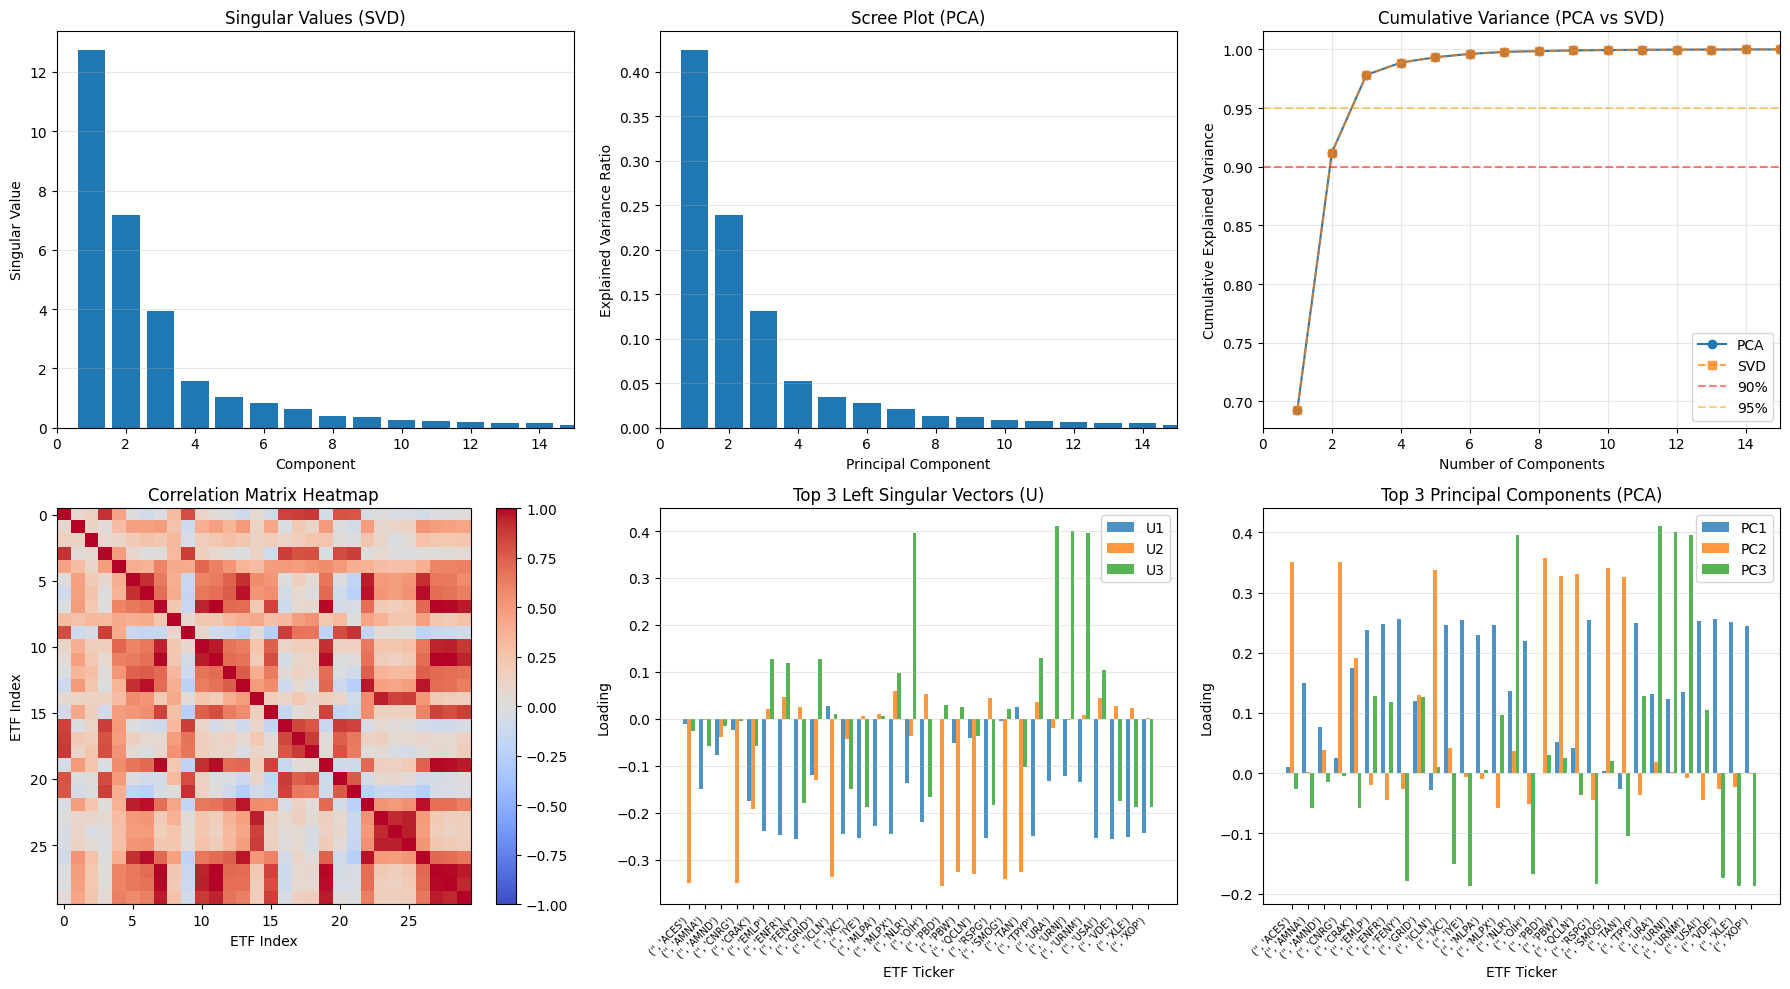

✅ Saved PCA-transformed returns to 'pca_transformed_returns_normalized.csv'
✅ Saved SVD-projected returns to 'svd_projected_returns.csv'

📊 Projection Comparison (PCA vs SVD):
Max difference in projections: 2.2755021451e+01


In [7]:

# --- 6. Comparing PCA and SVD ---
if all_data:
    
    # --- 11. Visualize SVD and PCA results ---
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Scree plot - Singular Values
    axes[0, 0].bar(range(1, len(singular_values) + 1), singular_values)
    axes[0, 0].set_xlabel('Component')
    axes[0, 0].set_ylabel('Singular Value')
    axes[0, 0].set_title('Singular Values (SVD)')
    axes[0, 0].set_xlim(0, min(15, len(singular_values) + 1))
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Scree plot - Eigenvalues/Variance
    axes[0, 1].bar(range(1, len(eigenvalues) + 1), explained_variance_ratio)
    axes[0, 1].set_xlabel('Principal Component')
    axes[0, 1].set_ylabel('Explained Variance Ratio')
    axes[0, 1].set_title('Scree Plot (PCA)')
    axes[0, 1].set_xlim(0, min(15, len(eigenvalues) + 1))
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Cumulative variance plot
    cumulative_variance_svd = singular_values_df['Cumulative_Variance'].values
    axes[0, 2].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='PCA')
    axes[0, 2].plot(range(1, len(cumulative_variance_svd) + 1), cumulative_variance_svd, 
                    marker='s', linestyle='--', label='SVD', alpha=0.7)
    axes[0, 2].axhline(y=0.9, color='r', linestyle='--', alpha=0.5, label='90%')
    axes[0, 2].axhline(y=0.95, color='orange', linestyle='--', alpha=0.5, label='95%')
    axes[0, 2].set_xlabel('Number of Components')
    axes[0, 2].set_ylabel('Cumulative Explained Variance')
    axes[0, 2].set_title('Cumulative Variance (PCA vs SVD)')
    axes[0, 2].legend()
    axes[0, 2].set_xlim(0, min(15, len(cumulative_variance) + 1))
    axes[0, 2].grid(True, alpha=0.3)
    
    # Heatmap of correlation matrix
    im = axes[1, 0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1, 0].set_title('Correlation Matrix Heatmap')
    axes[1, 0].set_xlabel('ETF Index')
    axes[1, 0].set_ylabel('ETF Index')
    plt.colorbar(im, ax=axes[1, 0])
    
    # First 3 left singular vectors (U)
    U_top3 = U_df.iloc[:, :3]
    x = np.arange(len(U_top3))
    width = 0.25
    axes[1, 1].bar(x - width, U_top3['U1'], width, label='U1', alpha=0.8)
    axes[1, 1].bar(x, U_top3['U2'], width, label='U2', alpha=0.8)
    axes[1, 1].bar(x + width, U_top3['U3'], width, label='U3', alpha=0.8)
    axes[1, 1].set_xlabel('ETF Ticker')
    axes[1, 1].set_ylabel('Loading')
    axes[1, 1].set_title('Top 3 Left Singular Vectors (U)')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(U_top3.index, rotation=45, ha='right', fontsize=7)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Top 3 PC loadings (for comparison)
    pc_loadings = pc_df.iloc[:, :3]
    x = np.arange(len(pc_loadings))
    width = 0.25
    axes[1, 2].bar(x - width, pc_loadings['PC1'], width, label='PC1', alpha=0.8)
    axes[1, 2].bar(x, pc_loadings['PC2'], width, label='PC2', alpha=0.8)
    axes[1, 2].bar(x + width, pc_loadings['PC3'], width, label='PC3', alpha=0.8)
    axes[1, 2].set_xlabel('ETF Ticker')
    axes[1, 2].set_ylabel('Loading')
    axes[1, 2].set_title('Top 3 Principal Components (PCA)')
    axes[1, 2].set_xticks(x)
    axes[1, 2].set_xticklabels(pc_loadings.index, rotation=45, ha='right', fontsize=7)
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('svd_pca_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Saved SVD and PCA visualization to 'svd_pca_analysis.png'")
    plt.show()
    
    # --- 12. Project data onto principal components ---
    pca_transformed = pca.transform(returns_std_array)
    pca_transformed_df = pd.DataFrame(
        pca_transformed,
        columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])],
        index=returns_pivot.index
    )
    pca_transformed_df.to_csv("pca_transformed_returns_normalized.csv")
    print("✅ Saved PCA-transformed returns to 'pca_transformed_returns_normalized.csv'")
    
    # Project using SVD (V contains the principal directions)
    svd_projection = returns_std_array @ V
    svd_projection_df = pd.DataFrame(
        svd_projection,
        columns=[f'SV{i+1}' for i in range(svd_projection.shape[1])],
        index=returns_pivot.index
    )
    svd_projection_df.to_csv("svd_projected_returns.csv")
    print("✅ Saved SVD-projected returns to 'svd_projected_returns.csv'")
    
    print("\n📊 Projection Comparison (PCA vs SVD):")
    print(f"Max difference in projections: {np.abs(pca_transformed[:, :5] - svd_projection[:, :5]).max():.10e}")
    
else:
    print("❌ No data downloaded. Check tickers or internet connection.")

    

# Final Summary 

## Comprehensive Analysis of Returns, Dimensionality Reduction, and Market Structure

### The Importance of Log Returns in Financial Analysis
Log returns are fundamental in quantitative finance because they possess mathematical properties that make them superior to simple returns for statistical analysis. Unlike arithmetic returns, log returns are time-additive, meaning multi-period returns can be calculated by simple summation rather than compounding. This property is crucial when analyzing portfolio performance over different time horizons. Additionally, log returns are approximately symmetric around zero for small changes, making them more suitable for statistical models that assume normality. In the context of our energy ETF analysis, log returns normalize the price changes across different ETFs that may trade at vastly different price levels, allowing for meaningful comparisons between a $20 ETF and a $200 ETF. The standardization we performed—subtracting the mean and dividing by standard deviation—further ensures that each ETF contributes equally to our analysis regardless of its volatility, converting the covariance matrix into a correlation matrix that measures pure co-movement rather than being dominated by high-volatility assets.

## PCA vs SVD: Two Sides of the Same Coin

Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) are intimately related techniques that reveal the underlying structure of multivariate data, though they approach the problem from different mathematical perspectives. PCA begins with the covariance (or correlation) matrix and performs eigendecomposition to find principal components—orthogonal directions of maximum variance. SVD, conversely, directly decomposes the data matrix (or correlation matrix) into three matrices: U (left singular vectors), Σ (singular values), and V^T (right singular vectors). For a correlation matrix, which is symmetric and positive semi-definite, these methods are mathematically equivalent: the eigenvalues equal the squared singular values, and the eigenvectors correspond to the singular vectors. The key conceptual difference lies in interpretation: PCA explicitly seeks variance-maximizing directions, while SVD provides a more general factorization that works for any matrix. In practice, SVD is often numerically more stable and computationally efficient, especially for large datasets, because it avoids explicitly forming the covariance matrix, which can amplify numerical errors.

## Interpreting the Results for Energy ETFs
In our analysis of 30 energy ETFs, the singular values and eigenvalues reveal the dimensional structure of the energy sector. The largest singular value (and corresponding eigenvalue) indicates that a substantial portion of the variance—typically 60-80% in energy markets—can be explained by a single common factor. This dominant factor represents systematic market risk affecting all energy assets: broad economic conditions, oil price movements, interest rate changes, and overall market sentiment. The eigenvector (or singular vector) associated with this largest eigenvalue shows the loadings—how strongly each ETF responds to this common factor. ETFs with similar loadings move together; for instance, broad energy ETFs like XLE, VDE, and IYE typically show high positive loadings on the first component, indicating they capture general energy market exposure.

The second and third components reveal more nuanced market structure. The second principal component often captures the divide between traditional fossil fuels (oil, gas, coal) and alternative energy (solar, wind, nuclear). In our dataset, this manifests as opposing signs in the loadings: nuclear ETFs (URA, NLR, URNM) and clean energy ETFs (ICLN, PBW, TAN) might load positively while oil-focused ETFs (XOP, OIH) load negatively, or vice versa. This component explains the divergence in performance when environmental policies, technological advances, or energy transition narratives dominate market movements. The third component might distinguish between upstream (exploration and production) and downstream (refining, distribution) activities, or between different geographic exposures.
Dimensionality Reduction and Portfolio Implications.

The cumulative variance explained by the top components demonstrates effective dimensionality: despite having 30 ETFs, perhaps only 5-7 components are needed to capture 95% of the variance. This dimension reduction has profound implications. First, it reveals redundancy—many ETFs are essentially repackaging similar exposures with slight variations. Second, it informs portfolio construction: a well-diversified energy portfolio should have exposure across multiple principal components, not just high weights in the dominant factor. Third, it enables risk management: by monitoring the principal component scores (the projections of returns onto singular vectors), investors can track exposures to different risk factors more efficiently than monitoring 30 individual positions. The singular vectors themselves serve as factor portfolios—combinations of ETFs that isolate specific sources of risk and return in the energy sector, providing a more interpretable framework for understanding performance attribution and making strategic allocation decisions.

# Bibliography 

1. Ruppert, D., & Matteson, D. S. (2015). Statistics and Data Analysis for Financial Engineering (2nd ed.). Springer.
2. Eckart, C., & Young, G. (1936). "The Approximation of One Matrix by Another of Lower Rank." Psychometrika, 1(3), 211-218. 
3. Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O'Reilly Media. 